# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# Replace with path to the downloaded environment
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

In [6]:
#env.close()

### 4. Training

Here we define the training loop for the multi-agent, the goal is to achieve an average score of +0.5 during 100 episodes.

In [12]:
import torch

def train(agent, n_episodes=10000, max_t=700, print_every=10):
    scores_deque = deque(maxlen=print_every)
    scores = []
    try:
        for i_episode in range(1, n_episodes+1):
            states = env.reset(train_mode=True)[brain_name].vector_observations
            agent.reset()
            score = np.zeros(num_agents)
            for t in range(max_t + i_episode): # increase max steps as we learn
                actions = agent.act(states)
                env_info = env.step(actions)[brain_name]
                next_states = env_info.vector_observations
                rewards = env_info.rewards
                dones = env_info.local_done
                agent.step(states, actions, rewards, next_states, dones)
                states = next_states
                score += rewards
                if np.any(dones):
                    break 
            scores_deque.append(score.max())
            scores.append(score.max())
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
            if i_episode % print_every == 0:
                print('\rEpisode {}\tAverage Score: {:.2f}\tMax Score: {:.2f}'.format(i_episode, np.mean(scores_deque), np.max(scores_deque)))
            if np.mean(scores[-100:]) >= .5 and i_episode > 100:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode - 100, np.mean(scores[-100:])))
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
                for i in range(num_agents):
                    torch.save(agent.critic_locals[i].state_dict(), 'checkpoint_critic_agent{}.pth'.format(i+1))
                break
    
    except KeyboardInterrupt as error:
        print("Interrupting training")

    return agent, scores

In [13]:
from ddpg_agent import MultiAgent
from collections import deque
import matplotlib.pyplot as plt

multi_agent = MultiAgent(state_size, action_size, 42, num_agents)

multi_agent, scores = train(multi_agent)

Episode 10	Average Score: 0.00	Max Score: 0.00
Episode 20	Average Score: 0.00	Max Score: 0.00
Episode 30	Average Score: 0.00	Max Score: 0.00
Episode 40	Average Score: 0.00	Max Score: 0.00
Episode 50	Average Score: 0.00	Max Score: 0.00
Episode 60	Average Score: 0.00	Max Score: 0.00
Episode 70	Average Score: 0.01	Max Score: 0.10
Episode 80	Average Score: 0.00	Max Score: 0.00
Episode 90	Average Score: 0.00	Max Score: 0.00
Episode 100	Average Score: 0.00	Max Score: 0.00
Episode 110	Average Score: 0.00	Max Score: 0.00
Episode 120	Average Score: 0.00	Max Score: 0.00
Episode 130	Average Score: 0.03	Max Score: 0.10
Episode 140	Average Score: 0.01	Max Score: 0.09
Episode 150	Average Score: 0.03	Max Score: 0.10
Episode 160	Average Score: 0.00	Max Score: 0.00
Episode 170	Average Score: 0.00	Max Score: 0.00
Episode 180	Average Score: 0.00	Max Score: 0.00
Episode 190	Average Score: 0.00	Max Score: 0.00
Episode 200	Average Score: 0.00	Max Score: 0.00
Episode 210	Average Score: 0.00	Max Score: 0.00
E

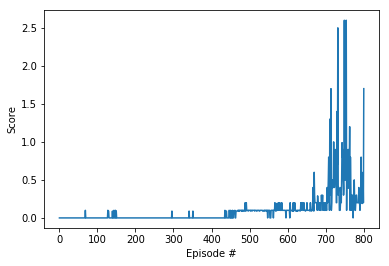

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [15]:
env.close()